# Effects of Customer Attributes on Churning

## Investigation Overview

In this investigation, I wanted to look at some customers features that could be used to predict Churn. The main focus was on the four Cs of Customer subscription : SeniorCitizen, Monthly Charges, Tenure (Subscription period) and Contract type.

## Dataset Overview

The data consisted of Churn and attributes of approximately 7000 Telecom customers. The attributes included (gender','SeniorCitizen','Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'), Most variables are categorical (Yes or No), Only both Charges and Tenure are numeric in nature.

In [1]:
#Importing needable packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns', None)
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the data file to pandas and having a fast view ...
#i noticed that null values hee need to be identified in reading line code...
tel_users=pd.read_csv("Telecom-Customer-Retention.csv",na_values=' ')


In [3]:
#convert MultipleLines, InternetService, Contract, and  PaymentMethod into ordered categorical types
ordinal_var_dict = {'MultipleLines': ['No phone service', 'No', 'Yes'],
                    'InternetService': ['No', 'DSL', 'Fiber optic'],
                    'Contract':['Month-to-month', 'One year', 'Two year'],
                    'PaymentMethod':['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],
                   'OnlineSecurity':['No internet service','No','Yes'],
                    'OnlineBackup':['No internet service','No','Yes'],
                    'DeviceProtection':['No internet service','No','Yes'],
                    'TechSupport':['No internet service','No','Yes'],
                    'StreamingTV':['No internet service','No','Yes'],
                    'StreamingMovies':['No internet service','No','Yes']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    tel_users[var] = tel_users[var].astype(ordered_var)

In [4]:
# data wrangling, Filling missing data nd corecting data types.
tel_users["TotalCharges"].fillna(tel_users["MonthlyCharges"],inplace=True)
tel_users["TotalCharges"]=tel_users["TotalCharges"].astype(float)
tel_users["SeniorCitizen"]=tel_users["SeniorCitizen"].astype(str)
tel_users['SeniorCitizen']=tel_users['SeniorCitizen'].apply(lambda x:x.replace('0',"No"))
tel_users['SeniorCitizen']=tel_users['SeniorCitizen'].apply(lambda x:x.replace('1',"Yes"))
#Done

## Distribution of Customer's Churn

Customer's Churn in the dataset take only 2 values, Yes for unsubscribers and No for retained ustomers. Plotted by a count plot, The Percentage of leaving customers is nearly 26.5 %.

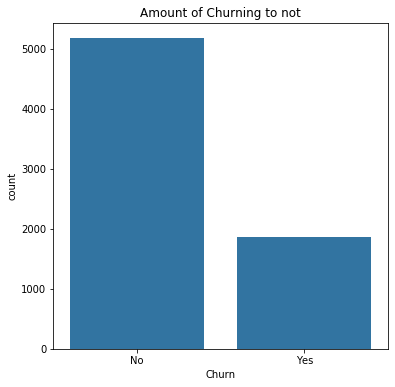

In [5]:
base_c=sb.color_palette()[0]
plt.figure(figsize=(6, 6))
sb.countplot(tel_users['Churn'],color=base_c)
plt.title('Amount of Churning to not')
plt.show()

## Distribution of Tenure (Subscription Period at Company)

Tenure is the period of being company customer, it has 2 peaks at both far sides, with laying crescent shape as the lowest point at the middle and exactly at 44-46 Months.

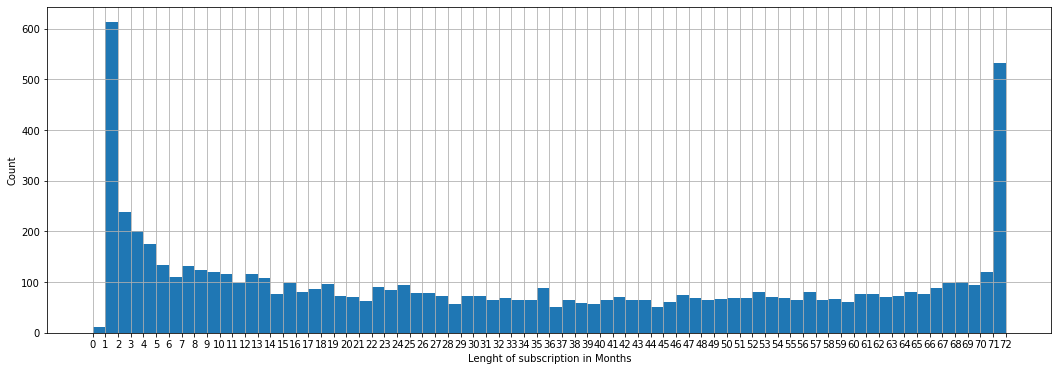

In [6]:
plt.figure(figsize=(18, 6))
bins_t=np.arange(0,tel_users['tenure'].max()+1,1)
ticks_t=np.arange
plt.xlabel("Lenght of subscription in Months")
plt.ylabel("Count")
plt.xticks(bins_t)
plt.hist(tel_users['tenure'],color=base_c,bins=bins_t,rwidth=1)
plt.grid()
plt.show()

## Distribution of Monthly Charges
The Dist. is nearly like a bimodel one, Many have between 15-25 USD charge, the curve goes down at it's lowest at 30-35 then turn up again until reahes the second model peak at 80-85 USD then downwards again, The proper explanation is charges maybe depends on the amount of services the customer is subscribing, The more services the more Charges.

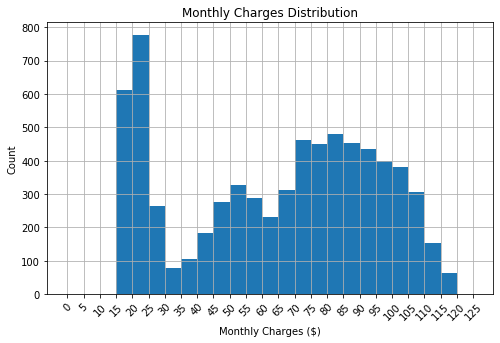

In [7]:
plt.figure(figsize=(8,5))
bins_mc=np.arange(0,tel_users.MonthlyCharges.max()+10,5)
plt.hist(x=tel_users.MonthlyCharges,color=base_c,bins=bins_mc)
plt.xticks(bins_mc,rotation=45)
plt.grid()
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.title('Monthly Charges Distribution')
plt.show()

## Churn vs. Contract Type
Plotting Churn across Contrct  most churning customers have month to month Contracts, Who contracted for a year or two are very more likely to remain, I would also say having a long-term contract makes it more difficult to leave.

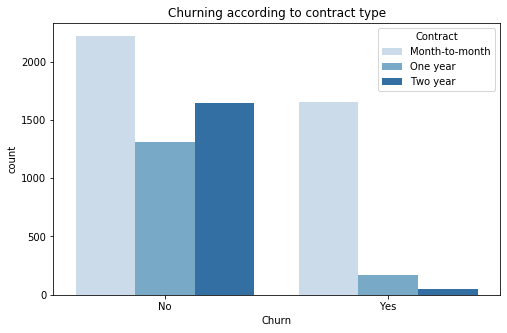

In [8]:
plt.figure(figsize=(8,5))
plt.title("Churning according to contract type")
sb.countplot(x=tel_users.Churn,hue=tel_users.Contract,palette='Blues')
plt.show()

## Churn vs. Tenure
Plotting Churn across Tenure suggests that the more the customer been subscribing to service the more he tends to stay as the average tenre of leaving customers is less than 20 Months while staying ones Tenure average is about 40 Months.

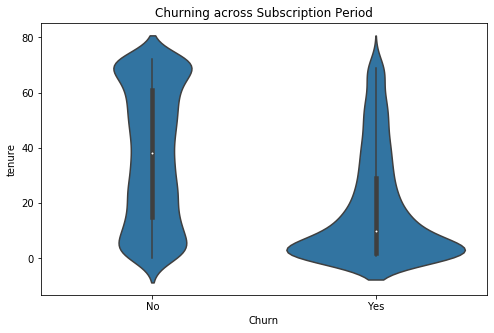

In [9]:
plt.figure(figsize=(8,5))
sb.violinplot(x=tel_users.Churn,y=tel_users.tenure,color=base_c)
plt.title('Churning across Subscription Period')
plt.show()

## Churn vs. Monthly Charges
Plotting Churn across Monthly Charges suggests that the more the customer is charged for the service the more he tends to leave as the average Charges of leaving customers is more than 80 or more USD per Month while staying ones Charges average is about 60 or less USD per Month and the density also in this plot supports the claim.

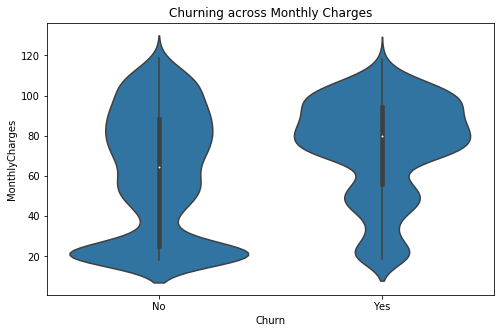

In [10]:
plt.figure(figsize=(8,5))
sb.violinplot(x=tel_users.Churn,y=tel_users.MonthlyCharges,color=base_c)
plt.title('Churning across Monthly Charges')
plt.show()

## Contrat Over Monthly Charges and Churn
Before we noticed that most unsubscribers are with Monthly contracts, Here it makes sense the more the contract period the more charges would be but we noticed something about the Churning, Also the highest paying customers regarding the contract type tend to leave, This makes it more obvious that charges are the most vital for customer's decision, but we observe also again that most if nearly all staying customers whose charges are under an average of 60 USD are eager to stay.

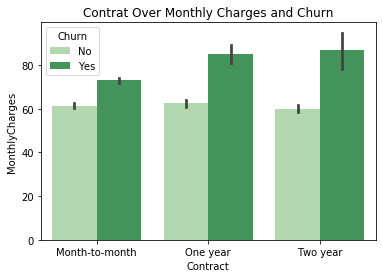

In [11]:
sb.barplot(x=tel_users.Contract,y=tel_users.MonthlyCharges,hue=tel_users.Churn,palette='Greens')
plt.title('Contrat Over Monthly Charges and Churn')
plt.show()

## Contrat Over Tenure and Churn
We observed before tenure has a relation with Churn, Here we make another insight, Even customer's who has been subscribed for a long period are more eager to stay, The longest period subscribers tends to leave among 1,2 year contracts and the exact opposite amonge those with Monthly contracts, This is interesting as when we looked deeper we now know now we need to be very catious about the subscription period and Contract type relation , More than 40 Months subscribers in 1 year contract tend to leave, More than 55 Months subscribers in 2 years contracts tend also to leave, The average of staying customers with monthly contracts is about 20 Month but the unsubscribers are with average 15 Month Period, This is an example of going deeper in analysing the data would sparks attention to underlying facts.

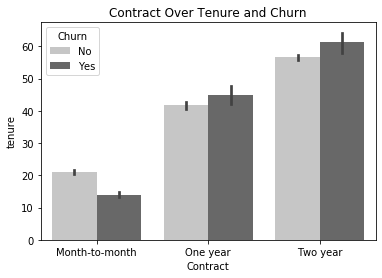

In [12]:
sb.barplot(x=tel_users.Contract,y=tel_users.tenure,hue=tel_users.Churn,palette='Greys');
plt.title('Contract Over Tenure and Churn')
plt.show()